# Modcloth Exploratory Data Analysis

Key Definitions:
- User Attribute: Average size that the user purchases 
- Model Attribute: Size of models shown to users in pictures/websites/ads
- Fit: Fit of the user 
- Size: Size of the user

## Loading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mod=pd.read_csv("modcloth.csv")

## Inspecting the Data

In [2]:
#viewing the first five rows
mod.head(5)

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0


In [3]:
# inspecting the shape of the dataframe
mod.shape

(99893, 12)

In [4]:
# data types of mod
mod.dtypes

item_id         int64
user_id        object
rating          int64
timestamp      object
size          float64
fit            object
user_attr      object
model_attr     object
category       object
brand          object
year            int64
split           int64
dtype: object

In [5]:
# checking the number of missing values
mod.isnull().sum()

item_id           0
user_id           1
rating            0
timestamp         0
size          21760
fit           18506
user_attr      8367
model_attr        0
category          0
brand         73980
year              0
split             0
dtype: int64

In [6]:
# inspecting the dataframe 
mod.describe()

,item_id,rating,size,year,split
count,99893.000000,99893.000000,78133.000000,99893.000000,99893.000000
mean,83944.091208,4.209594,3.217322,2015.476450,0.358564
std,43558.135979,1.080633,1.885934,1.970262,0.720993
min,6454.000000,1.000000,0.000000,2010.000000,0.000000
25%,48629.000000,4.000000,2.000000,2014.000000,0.000000
50%,77878.000000,5.000000,3.000000,2016.000000,0.000000
75%,120126.000000,5.000000,4.000000,2017.000000,0.000000
max,155950.000000,5.000000,8.000000,2019.000000,2.000000


## Data Cleaning 

In [7]:
#removing missing values for size and user id
mod.dropna(subset=['size', 'user_id'], inplace = True)

In [8]:
#unique values for fit 
mod['fit'].unique()

array(['Just right', 'Slightly large', 'Slightly small', 'Very small',
       'Very large', nan], dtype=object)

In [9]:
# unique values for user attribute
mod['user_attr'].unique()

array(['Small', 'Large'], dtype=object)

In [10]:
# unique values for model attribute
mod['model_attr'].unique()

array(['Small', 'Small&Large'], dtype=object)

In [ ]:
# after removing null values for size, we are only left with missing values for fit and brand
# since more than half of the dataset consists of missing values for brand, we won't be removing those observations 
mod.isnull().sum()

item_id           0
user_id           0
rating            0
timestamp         0
size              0
fit            7213
user_attr         0
model_attr        0
category          0
brand         59575
year              0
split             0
dtype: int64

In [11]:
# inspecting unique values of fit for each size
for i in mod['size'].unique():
    print('size', i)
    print(mod[mod['size'] == i].fit.unique())
    print('-------')

size 1.0
['Just right' 'Slightly small' 'Slightly large' 'Very large' 'Very small'
 nan]
-------
size 2.0
['Just right' 'Slightly small' 'Slightly large' 'Very large' 'Very small'
 nan]
-------
size 3.0
['Just right' 'Slightly large' 'Slightly small' 'Very small' 'Very large'
 nan]
-------
size 7.0
['Just right' 'Very small' 'Slightly small' 'Slightly large' 'Very large'
 nan]
-------
size 4.0
['Slightly small' 'Just right' 'Very small' 'Slightly large' 'Very large'
 nan]
-------
size 6.0
['Very small' 'Just right' 'Slightly small' 'Slightly large' 'Very large'
 nan]
-------
size 5.0
['Just right' 'Slightly large' 'Very small' 'Slightly small' 'Very large'
 nan]
-------
size 8.0
['Very small' 'Slightly small' 'Slightly large' 'Very large' 'Just right'
 nan]
-------
size 0.0
['Just right' 'Slightly large' 'Very large' 'Slightly small' nan]
-------


The above loop displays that all sizes have fit values ranging from small to large which does not provide an accurate representation of the user fit. An example is also provided below, where 104 users of size 8 have a 'very small' fit which is misleading.

In [14]:
# 104 users of size 8 have a 'very small' fit 
mod[(mod['size'] == 8) & (mod['fit'] == 'Very small')]

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
1760,27590,Cattie,3,2012-02-26 08:00:00+00:00,8.0,Very small,Large,Small,Bottoms,NaN,2016,1
6417,7443,ericanrainey,1,2013-05-31 07:00:00+00:00,8.0,Very small,Large,Small,Dresses,NaN,2012,0
6818,7443,muneca0801,1,2013-06-20 07:00:00+00:00,8.0,Very small,Large,Small,Dresses,NaN,2012,0
6966,7443,Lorraine,4,2013-06-28 07:00:00+00:00,8.0,Very small,Large,Small,Dresses,NaN,2012,0
8016,27590,muelle_de_luz,5,2013-08-18 07:00:00+00:00,8.0,Very small,Large,Small,Bottoms,NaN,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...
77427,154538,Leannel,2,2017-10-14 07:00:00+00:00,8.0,Very small,Large,Small,Dresses,Banned,2017,0
93174,150043,Swedegirl,2,2018-08-13 20:51:00.358000+00:00,8.0,Very small,Large,Small&Large,Tops,NaN,2018,0
93871,36172,Sherman,1,2018-09-21 17:20:45.303000+00:00,8.0,Very small,Large,Small&Large,Tops,NaN,2016,2
96414,36172,Marlins,2,2018-12-10 03:51:36.779000+00:00,8.0,Very small,Large,Small&Large,Tops,NaN,2016,0


In [24]:
(mod[(mod['size'] == 8) & (mod['fit'] == 'Very small') & (mod['model_attr'] == 'Small')]).shape

(41, 12)

In [25]:
mod[(mod['size'] == 7) & (mod['fit'] == 'Very small')]

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
344,7443,rachael.margarita,1,2011-02-24 08:00:00+00:00,7.0,Very small,Large,Small,Dresses,NaN,2012,0
1786,16411,Leeny,2,2012-02-29 08:00:00+00:00,7.0,Very small,Large,Small,Dresses,NaN,2011,0
2236,16411,jcpollutra,1,2012-05-22 07:00:00+00:00,7.0,Very small,Large,Small,Dresses,NaN,2011,0
6482,21296,milonde,3,2013-06-05 07:00:00+00:00,7.0,Very small,Large,Small,Bottoms,ModCloth,2013,0
7246,21296,dani_elley05,2,2013-07-12 07:00:00+00:00,7.0,Very small,Large,Small,Bottoms,ModCloth,2013,0
...,...,...,...,...,...,...,...,...,...,...,...,...
98023,32134,MarathonMama,5,2019-02-04 17:54:59.592000+00:00,7.0,Very small,Large,Small&Large,Dresses,NaN,2018,0
98113,32134,Raleigh,2,2019-02-07 05:20:41.316000+00:00,7.0,Very small,Large,Small&Large,Dresses,NaN,2018,0
98949,32134,Sewingmamaof3,5,2019-03-26 22:15:34.553000+00:00,7.0,Very small,Large,Small&Large,Dresses,NaN,2018,2
99065,133399,ny,1,2019-04-06 02:50:01.063000+00:00,7.0,Very small,Large,Small&Large,Bottoms,Miss Candyfloss,2016,0


In [32]:
(mod[(mod['size'] == 7) & (mod['fit'] == 'Very small') & (mod['model_attr'] == 'Small')]).shape

(156, 12)

In [29]:
mod[(mod['size'] == 1) & (mod['fit'] == 'Very large')]

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
462,16411,releceb,1,2011-06-15 07:00:00+00:00,1.0,Very large,Small,Small,Dresses,NaN,2011,0
1210,16411,nerual86,5,2011-12-05 08:00:00+00:00,1.0,Very large,Small,Small,Dresses,NaN,2011,0
1410,31644,Lori,2,2012-01-03 08:00:00+00:00,1.0,Very large,Small,Small&Large,Dresses,NaN,2015,0
1698,22563,lauren,1,2012-02-18 08:00:00+00:00,1.0,Very large,Small,Small,Tops,NaN,2014,0
2337,22563,Venecia,3,2012-06-06 07:00:00+00:00,1.0,Very large,Small,Small,Tops,NaN,2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...
97213,140525,Ashley,3,2018-12-31 14:26:54.088000+00:00,1.0,Very large,Small,Small&Large,Tops,NaN,2017,0
97214,146475,Ashley,5,2018-12-31 14:36:01.783000+00:00,1.0,Very large,Small,Small&Large,Tops,NaN,2018,0
97295,143422,SF,3,2019-01-04 04:07:00.155000+00:00,1.0,Very large,Small,Small,Outerwear,NaN,2017,2
98765,27439,Chicago,3,2019-03-12 17:06:40.878000+00:00,1.0,Very large,Small,Small&Large,Outerwear,Steve Madden,2018,0


In [30]:
mod[(mod['size'] == 1) & (mod['fit'] == 'Very large') & (mod['model_attr'] == 'Small&Large')]

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
1410,31644,Lori,2,2012-01-03 08:00:00+00:00,1.0,Very large,Small,Small&Large,Dresses,NaN,2015,0
2635,44893,Pooja,2,2012-07-22 07:00:00+00:00,1.0,Very large,Small,Small&Large,Tops,NaN,2012,0
2676,50818,Harmony,3,2012-07-29 07:00:00+00:00,1.0,Very large,Small,Small&Large,Bottoms,NaN,2016,0
2959,44261,Allie,4,2012-09-15 07:00:00+00:00,1.0,Very large,Small,Small&Large,Tops,NaN,2014,0
3199,49587,ModNicole,2,2012-10-02 07:00:00+00:00,1.0,Very large,Small,Small&Large,Dresses,NaN,2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96651,144543,JDK,1,2018-12-14 17:06:20.477000+00:00,1.0,Very large,Small,Small&Large,Tops,NaN,2019,0
97213,140525,Ashley,3,2018-12-31 14:26:54.088000+00:00,1.0,Very large,Small,Small&Large,Tops,NaN,2017,0
97214,146475,Ashley,5,2018-12-31 14:36:01.783000+00:00,1.0,Very large,Small,Small&Large,Tops,NaN,2018,0
98765,27439,Chicago,3,2019-03-12 17:06:40.878000+00:00,1.0,Very large,Small,Small&Large,Outerwear,Steve Madden,2018,0


The model pictures used to demonstrate the cloths may cause misunderstanding to customers. People tend to buy smaller sizes when they are browsing cloths with small size model pictures. In contrast, people are more likely to buy larger sizes when they are given both the small and large size model pictures. For instance, for customers who wear size 8, almost 40% of the 'Very small' fit feedback provided with a small size model attribution picture. Similarly, for customers who wear size 7, almost 70% of the 'Very small' fit feedback provided with a small size model attribution picture. For customers who wear size 1, almost 55% of the 'Very large' fit feedback provided with both Small&Large model attribution pictures. 

For this reason, we create a new column which accurately represents the fit of each user
- Size 0-2: Small
- Size 3-5: Medium
- Size 6-8: Large 

In [33]:
# a new column 'fit_of_user' provides an accurate representation of user fit 
col = []
for i in mod['size']:
    if i <= 2:
        col.append('small')
    elif (i >= 3) & (i <= 5):
        col.append('medium')
    else:
        col.append('large')
        
mod['fit_of_user'] = col
#inspecting the dataframe with the new column
mod.sample(5)

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split,fit_of_user
35792,70538,lrbouchard,5,2015-06-03 07:00:00+00:00,4.0,Just right,Small,Small&Large,Dresses,ModCloth,2017,0,medium
52844,31644,I.,5,2016-03-14 07:00:00+00:00,2.0,Just right,Small,Small&Large,Dresses,NaN,2015,2,small
55846,59176,kristirae1,5,2016-04-29 07:00:00+00:00,3.0,Just right,Small,Small&Large,Tops,ModCloth,2013,2,medium
46673,107927,adaranyx,5,2015-12-04 08:00:00+00:00,6.0,Just right,Large,Small&Large,Dresses,NaN,2016,0,large
93090,153517,Nat,4,2018-08-12 18:54:26.862000+00:00,3.0,Slightly large,Large,Small&Large,Tops,ModCloth,2019,2,medium


In [34]:
# a new dataframe has been created to only filter for features that will be used in EDA
df = mod[['item_id', 'user_id', 'size', 'fit_of_user', 'user_attr', 'model_attr', 'category']]
df.head(5)

,item_id,user_id,size,fit_of_user,user_attr,model_attr,category
119,7443,Mona,1.0,small,Small,Small,Dresses
121,11960,Devon,2.0,small,Small,Small&Large,Outerwear
123,11960,Cara,2.0,small,Small,Small&Large,Outerwear
125,11960,Hanaa,3.0,medium,Small,Small&Large,Outerwear
129,16411,Cecilia,3.0,medium,Small,Small,Dresses


In [35]:
df.shape

(78132, 7)

In [36]:
df.isnull().sum()

item_id        0
user_id        0
size           0
fit_of_user    0
user_attr      0
model_attr     0
category       0
dtype: int64

## Exploratory Data Analysis 

In [37]:
df.groupby('fit_of_user').size()

fit_of_user
large     11745
medium    32899
small     33488
dtype: int64

In [38]:
df.groupby('user_attr').size()

user_attr
Large    16686
Small    61446
dtype: int64

In [39]:
# a higher proportion of users belong to small and medium fit categories 
print(df.groupby('fit_of_user').size())

fit_of_user
large     11745
medium    32899
small     33488
dtype: int64


In [42]:
mod1=df.groupby(['fit_of_user','model_attr']).size()
type(mod1)
cross=mod1.to_frame()
cross

0
fit_of_user model_attr        
large       Small         4657
            Small&Large   7088
medium      Small        13460
            Small&Large  19439
small       Small        14019
            Small&Large  19469

In [46]:
prop_df

,fit_of_user,model_attr,prop
0,large,Small&Large,0.603491
1,large,Small,0.396509
2,medium,Small&Large,0.590869
3,medium,Small,0.409131
4,small,Small&Large,0.581372
5,small,Small,0.418628


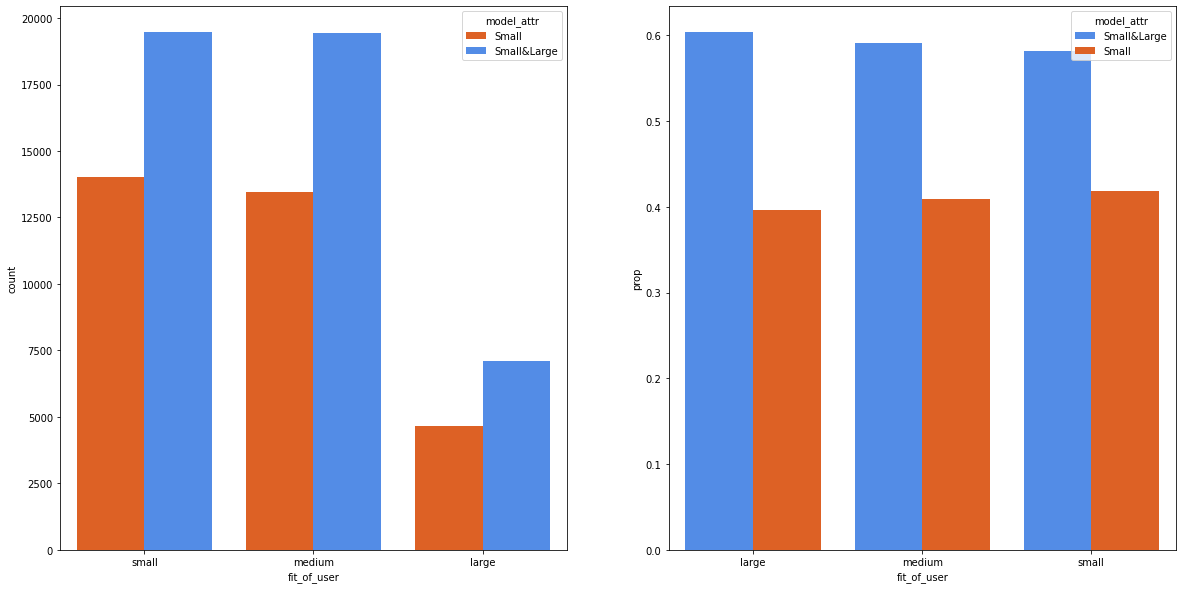

In [64]:
x, y, hue = "fit_of_user", "prop", "model_attr"

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0], palette=["#fb5607", "#3a86ff"])
f.set_size_inches(20, 10)
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1], palette=["#3a86ff", "#fb5607"])

- The table (crosstab) and bar charts above display that ads of small sized models are shown to users who have small, medium and large fit
- The proportion of large sized models shown to small, medium and large fit users are almost the same, with the large fit users is a slighly higher than the other groups. 

In [ ]:
mod1=df.groupby(['user_attr','fit_of_user']).size()
type(mod1)
cross=mod1.to_frame()
cross

0
user_attr fit_of_user       
Large     large         9234
          medium        7144
          small          308
Small     large         2511
          medium       25755
          small        33180

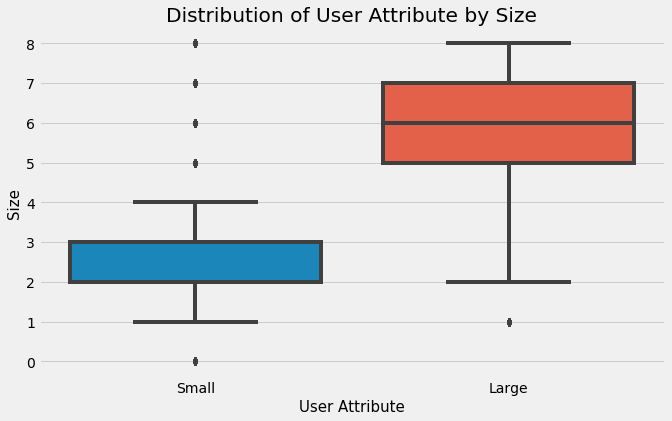

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
sns.boxplot(y="size",x ='user_attr' ,data = df)
plt.title("Distribution of User Attribute by Size")
plt.xlabel('User Attribute',fontsize=15)
plt.ylabel("Size",fontsize=15)
plt.show()

The boxplot displays some outliers which indicates that users who on average purchase small sized clothing sometimes purchase clothing of medium and large sizes as well

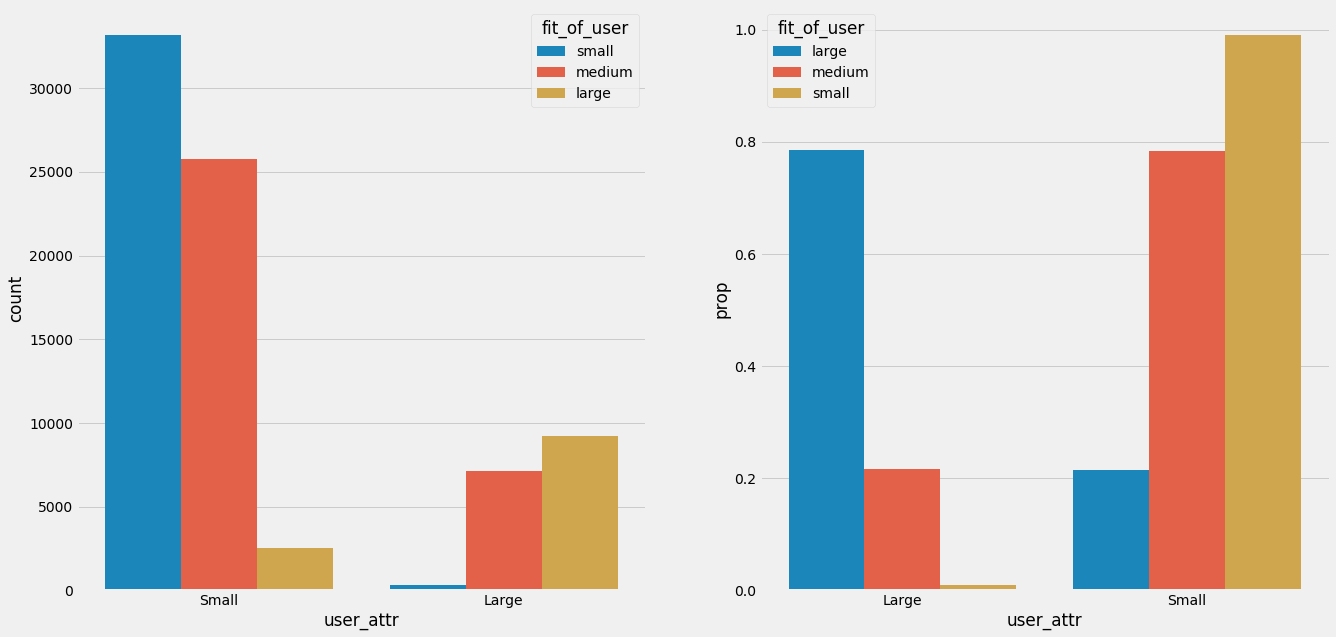

In [ ]:
x, y, hue = "user_attr", "prop", "fit_of_user"

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0])
f.set_size_inches(20, 10)
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

User attributes refers to the average size purchased by a user. The above visualization displays that on average:
- More than 95% of the users with a small size fit purchase small sized clothing
- About 75% of the users with a medium size fit purchase small sized clothing
- Approximately 25% of the users with a large size fit purchase small sized clothing as well. This could be attributed to peer pressure, or misrepresentation of clothing size based on models displayed in the ads (for example - a small built model displayed in an ad could influence a user with a large size fit to purchase small sized clothing). One more reason could be due to personal preferences, i.e. some users might prefer to wear tight fitted clothing.
- Majority of the users with a large size fit opt for large sized clothing, while ~25% of the users opt for purchasing medium sized clothing as well. 

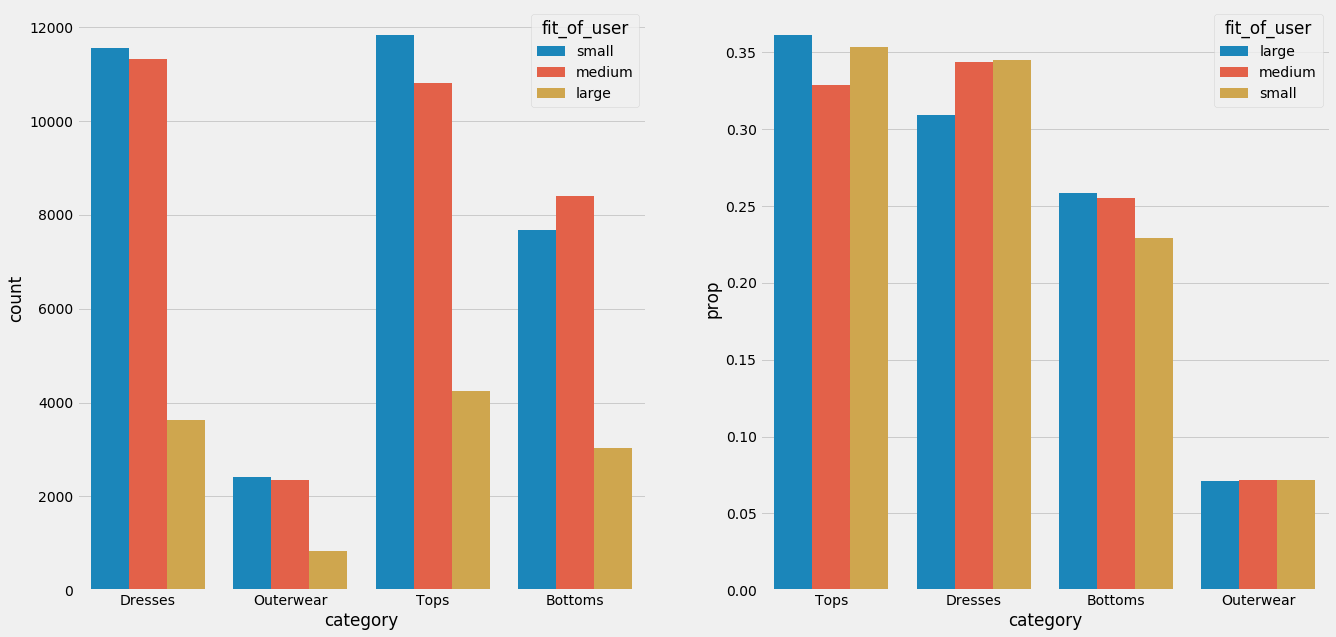

In [ ]:
x, y, hue = "category", "prop", "fit_of_user"

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0])
f.set_size_inches(20, 10)
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

In the above visualization, we notice that:
- Small and large sized users purchase more number of tops than medium sized users
- About the same percentage (33%) of small and medium sized users purchase dresses
- A greater proportion of large sized users purchase bottoms and approximately the same proportion of small, medium and large sized users purchase outerwear

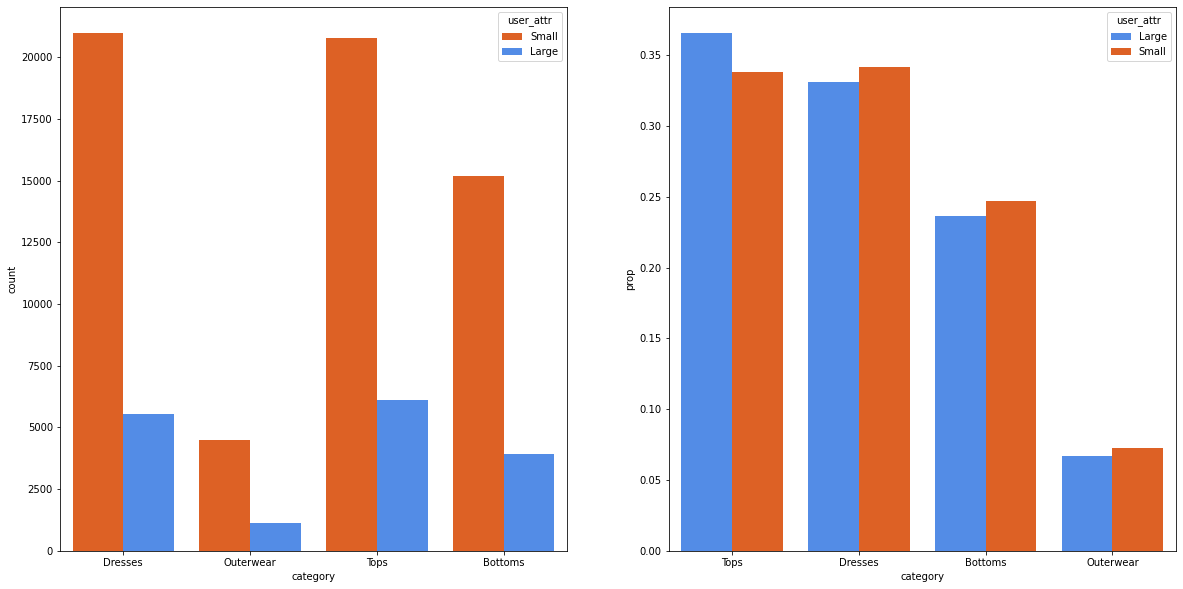

In [66]:
x, y, hue = "category", "prop", "user_attr"

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0], palette=["#fb5607", "#3a86ff"])
f.set_size_inches(20, 10)
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1], palette=["#3a86ff", "#fb5607"])

Compared to small size customers, a larger proportion of large size customers like to buy Tops. 

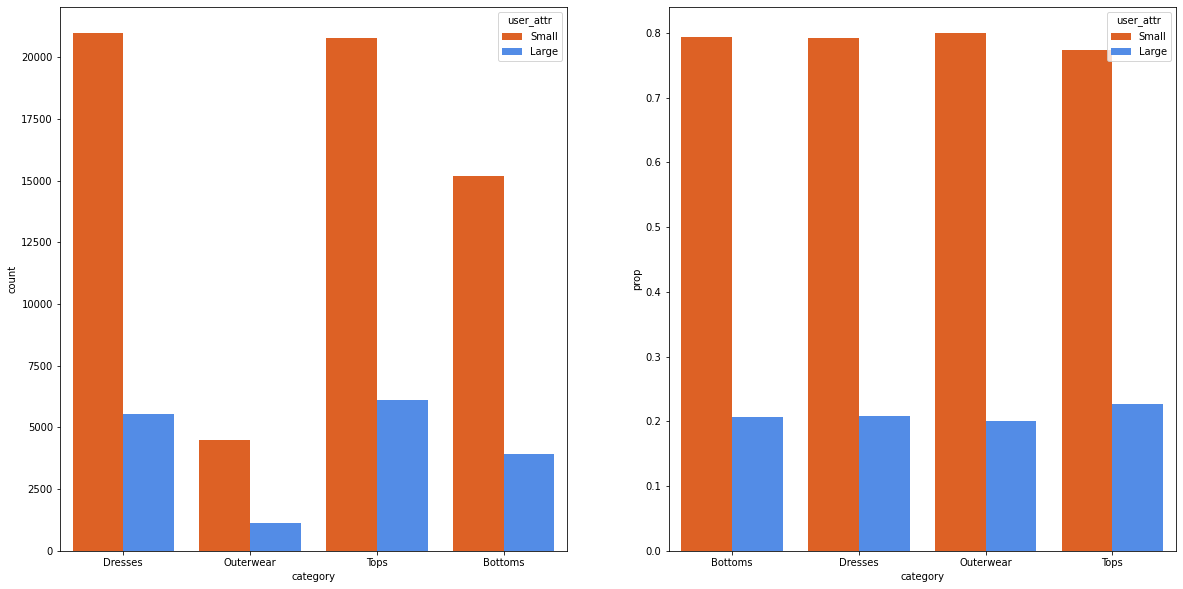

In [68]:
x, y, hue = "category", "prop", "user_attr"

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0], palette=["#fb5607", "#3a86ff"])
f.set_size_inches(20, 10)
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1], palette=["#fb5607", "#3a86ff"])

All cloth categories are overwhelmingly dominated by small size people. Almost 80% of the buyers are small size customers across all categories. The website should include more large size model pictures to attract more potential large size customers. 

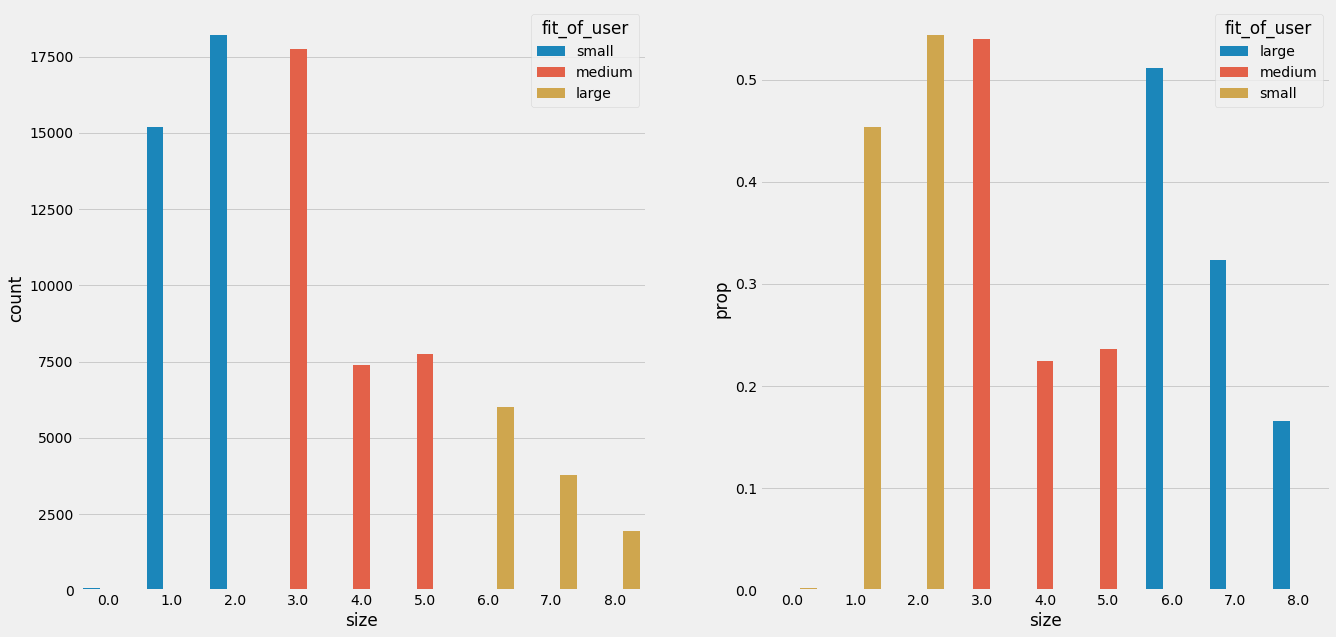

In [ ]:
x, y, hue = "size", "prop", "fit_of_user"

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0])
f.set_size_inches(20, 10)
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

The above visualization displays that:
- Majority (> 50%) of the small sized users purchase clothes of size 2 and almost a negligible number of users purchase size 0
- Majority (> 50%) of the medium sized users purchase clothes of size 3
- Majority (> 50%) of large sized users purchase clothes of size 6